# Restaurant Industry Consulting Firm
July 15, 2019<br>
Ngoc, EDA

-----------------

In this notebook, we want to:
- Find 2 most popular cuisines in each area (DC, VA, and MD) then t-test to figure out which one is best in each area (vs. number of reviews)
- Over night (vs. number of reviews, stars)

-------------------

## Import Needed Libraries

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

## Load Needed Data

In [2]:
df = pd.read_pickle("data/df_business_details.pkl")

Quick glance:

In [3]:
print(len(df))
df.head()

6754


,alias,categories,coordinates,display_phone,hours,id,image_url,is_claimed,is_closed,location,messaging,name,phone,photos,price,rating,review_count,special_hours,transactions,url
0,not-your-average-joes-silver-spring-2,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","{'latitude': 38.9973970530383, 'longitude': -7...",(240) 839-3400,"[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,https://s3-media3.fl.yelpcdn.com/bphoto/mZpusp...,True,False,"{'address1': '8661 Colesville Rd', 'address2':...",{'url': 'https://www.yelp.com/raq/not-your-ave...,Not Your Average Joe's,+12408393400,[https://s3-media3.fl.yelpcdn.com/bphoto/mZpus...,$$,3.5,372,NaN,[],https://www.yelp.com/biz/not-your-average-joes...
1,california-pizza-kitchen-at-tysons-corner-mcle...,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 38.9195057726529, 'longitude': -7...",(703) 761-1473,"[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,https://s3-media1.fl.yelpcdn.com/bphoto/kfu56b...,True,False,"{'address1': '7939 Tysons Corner Ctr', 'addres...",NaN,California Pizza Kitchen at Tysons Corner,+17037611473,[https://s3-media1.fl.yelpcdn.com/bphoto/kfu56...,$$,3.5,192,NaN,"[delivery, pickup]",https://www.yelp.com/biz/california-pizza-kitc...
2,ihop-college-park,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 39.01419, 'longitude': -76.92827}",(301) 982-7400,"[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,https://s3-media2.fl.yelpcdn.com/bphoto/zGN5vL...,True,False,"{'address1': '9680 Baltimore Ave', 'address2':...",NaN,IHOP,+13019827400,[https://s3-media2.fl.yelpcdn.com/bphoto/zGN5v...,$$,2.5,125,NaN,"[pickup, delivery]",https://www.yelp.com/biz/ihop-college-park?adj...
3,capitol-seafood-and-crab-district-heights,"[{'alias': 'seafood', 'title': 'Seafood'}]","{'latitude': 38.8541450500488, 'longitude': -7...",(301) 568-9234,NaN,-34232Z9Njha7auSGehjdQ,https://s3-media3.fl.yelpcdn.com/bphoto/4Kbfcc...,False,False,"{'address1': '6326 Marlboro Pike', 'address2':...",NaN,Capitol Seafood & Crab,+13015689234,[https://s3-media3.fl.yelpcdn.com/bphoto/4Kbfc...,$,4.0,13,NaN,[],https://www.yelp.com/biz/capitol-seafood-and-c...
4,dunkin-donuts-alexandria-25,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","{'latitude': 38.79054, 'longitude': -77.0764549}",(703) 379-1210,"[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,https://s3-media2.fl.yelpcdn.com/bphoto/oRtqDM...,False,False,"{'address1': '5836B N Kings Hwy', 'address2': ...",NaN,Dunkin’ Donuts,+17033791210,[https://s3-media2.fl.yelpcdn.com/bphoto/oRtqD...,$,4.5,2,NaN,[],https://www.yelp.com/biz/dunkin-donuts-alexand...


## EDA

Drop columns (straight out) not needed:

In [4]:
df.drop(columns=["alias", "coordinates", "display_phone", "image_url", "is_claimed", "is_closed",
                 "messaging", "phone", "photos", "transactions", "url"], inplace=True, axis=1)

More in-depth look:

In [5]:
df.head()

,categories,hours,id,location,name,price,rating,review_count,special_hours
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,$$,3.5,372,NaN
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,$$,2.5,125,NaN
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",NaN,-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,$,4.0,13,NaN
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,$,4.5,2,NaN


In [6]:
df.shape

(6754, 9)

Check for duplicates:

In [7]:
sum(df.id.duplicated())

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6754 entries, 0 to 6753
Data columns (total 9 columns):
categories       6754 non-null object
hours            5650 non-null object
id               6754 non-null object
location         6754 non-null object
name             6754 non-null object
price            5720 non-null object
rating           6754 non-null float64
review_count     6754 non-null int64
special_hours    126 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 475.0+ KB


**hours, price, and special_hours need special treatments!**

### Hours

In [152]:
df.iloc[0].hours

[{'open': [{'is_overnight': False, 'start': '1100', 'end': '2200', 'day': 0},
   {'is_overnight': False, 'start': '1100', 'end': '2300', 'day': 1},
   {'is_overnight': False, 'start': '1100', 'end': '2300', 'day': 2},
   {'is_overnight': False, 'start': '1100', 'end': '2300', 'day': 3},
   {'is_overnight': False, 'start': '1100', 'end': '0000', 'day': 4},
   {'is_overnight': False, 'start': '1100', 'end': '0000', 'day': 5},
   {'is_overnight': False, 'start': '1100', 'end': '2200', 'day': 6}],
  'hours_type': 'REGULAR',
  'is_open_now': False}]

is_overnight, hours_type

In [143]:
hours = df[~df.hours.isna()]
hours.reset_index(inplace=True, drop=True)

In [145]:
test = []
for row in range(len(hours)):
    for h in hours.iloc[row].hours[0]["open"]:
        if h["is_overnight"] != False:
#             if h["is_overnight"] != False:
#                 test.append(hours.iloc[row].id)
            test.append(hours.iloc[row].id)
            break
print(len(test))
test

1124


['-1Jfl_zix9l1RRWOPmzSEQ',
 '-4B2Bm0hXrr043xOj85dog',
 '-7mtTaJVlmx9TqWM-CAw-A',
 '-8TkrTNeebNwFGcfDKJgRQ',
 '-8cgezcs-xEpJ_K4O8LxVA',
 '-EbZgoRwfoHtYkGN2VVbVw',
 '-HFG7EOMJ_no-rKdYxbojg',
 '-NVpjIM1b0_4PbdX1d4wXw',
 '-OMQv4qP5wTkQ5viTIDVuw',
 '-XkoQgIL-wgHCkqRg9rhQQ',
 '-ZVeyeJEL0jHiUO_-u8CAw',
 '-bEH3OOngPUCYRGJsnkkDQ',
 '-bEzBJAavdMoQTHWxUJ4bA',
 '-fJExaZdJT03DbTGmxEuCg',
 '-fZ_-5koplvoYPLegzeXQw',
 '-pIkGmhj1FD3g6BmfRLu1w',
 '-q6IwRHCsSwc8q2QC-ZFVQ',
 '-upKi-Sc54rX7ajuhzUAAA',
 '-vnZh4pmSUt_-b1GlH0CcQ',
 '-xJPcKvE5OgZbjE8d21dLg',
 '-zR_X8Lh5j8Tu--c0Q67FQ',
 '02f0LHZ2ASNkQmcNeI2QrA',
 '06Ngk-iHG5W7TJ8pvA7s7A',
 '0A_OZ-7w0-Iivb6yoaNXqQ',
 '0BHO_-ydp2dHRjWgAdikqw',
 '0Bv8T5KmaGJKjASyqKPppg',
 '0E-VYhreGPhBrugmXewyaw',
 '0E3esimECC5W2Om-tSIJ9w',
 '0H01dKPAmfjeMpI1xki6MA',
 '0L8pZTnByKw6-PkvRR-1mw',
 '0Qaxx8nIDK24fIFyz3oJdQ',
 '0QoicLDs6j8pY3Wb0YRlNQ',
 '0RuSiuidEEAmUrC8WxEY3g',
 '0W-8tf9GdxX5y6F2JrbD5g',
 '0ZswnaP3SZj1X_-EJaiMcA',
 '0aLVeQikS7200jvvXbKdbA',
 '0beQu4iJZMjkZGFtUbtZqg',
 

In [164]:
hours[hours.id == "-8TkrTNeebNwFGcfDKJgRQ"]["hours"].iloc[0]

[{'open': [{'is_overnight': True, 'start': '1500', 'end': '0200', 'day': 0},
   {'is_overnight': True, 'start': '1500', 'end': '0200', 'day': 1},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 2},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 3},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 4},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 5},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 6}],
  'hours_type': 'REGULAR',
  'is_open_now': True}]

In [165]:
hours[hours.id == "28zGYjDKjDCPOTWWO11NHw"]["hours"].iloc[0]

[{'open': [{'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 0},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 1},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 2},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 3},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 4},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 5},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 6}],
  'hours_type': 'REGULAR',
  'is_open_now': True}]

really overnight? or pass midnight?

hours_type

In [166]:
test1 = []
for row in range(len(hours)):
    if hours.iloc[row].hours[0]["hours_type"] != "REGULAR":
        test1.append(hours.iloc[row].id)
print(len(test1))
test1

0


[]

### Special Hours

In [40]:
special_hours = df[~df.special_hours.isna()]
special_hours.reset_index(inplace=True, drop=True)

In [81]:
print(len(special_hours))
special_hours.head()

126


,categories,hours,id,location,name,price,rating,review_count,special_hours
0,"[{'alias': 'southafrican', 'title': 'South Afr...","[{'open': [{'is_overnight': False, 'start': '1...",-JdOButHwsdCxV7PocnSdg,"{'address1': '4401 Wilson Blvd', 'address2': N...",Nando's PERi-PERi,$$,3.5,103,"[{'date': '2019-11-28', 'is_closed': True, 'st..."
1,"[{'alias': 'fooddeliveryservices', 'title': 'F...","[{'open': [{'is_overnight': False, 'start': '1...",068uD-eBFAylOBR7mqutog,"{'address1': '5874 Crossroads Ctr', 'address2'...",Paisano's,$,3.5,92,"[{'date': '2019-11-28', 'is_closed': True, 'st..."
2,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","[{'open': [{'is_overnight': False, 'start': '1...",09t1c--C1-NjRnaJ_FIIWw,"{'address1': '1475 Pennsylvania Ave NW', 'addr...",The Occidental,$$$,3.5,396,"[{'date': '2019-09-02', 'is_closed': True, 'st..."
3,"[{'alias': 'mexican', 'title': 'Mexican'}]","[{'open': [{'is_overnight': False, 'start': '1...",0A0miTWeACDow_gzTEo52w,"{'address1': '4600 Wisconsin Ave NW', 'address...",District Taco,$,3.0,74,"[{'date': '2019-11-21', 'is_closed': True, 'st..."
4,"[{'alias': 'hotdogs', 'title': 'Fast Food'}]","[{'open': [{'is_overnight': False, 'start': '0...",0Bqsb5wAsqzqTcMv2lMemw,"{'address1': '12001 Rockville Pike', 'address2...",Chick-fil-A,$,3.0,175,"[{'date': '2019-09-02', 'is_closed': None, 'st..."


Find restaurants having special hours:

In [68]:
open_special_days = []
for row in range(len(special_hours)):
    for sh in special_hours.iloc[row].special_hours:
        if sh["is_closed"] != True:
            open_special_days.append(special_hours.iloc[row].id)
            break
print(len(open_special_days))
open_special_days[:5]

37


['0Bqsb5wAsqzqTcMv2lMemw',
 '0k8Flxj4LYElTgUNjDB-nA',
 '3AGZuiT_wrZbywBgQK81Gg',
 'BV2E2-sE2EG7IqWWqz-Ckg',
 'D17RgrlLBMamQRye9fYwnA']

There are only 37 restaurants having special hours.

Just out of curiosity, what are the special dates?

In [82]:
special_days = []
for row in range(len(special_hours)):
    for sh in special_hours.iloc[row].special_hours:
        if sh["is_closed"] != True:
            if sh["date"] not in special_days:
                special_days.append(sh["date"])
print(len(special_days))
special_days

14


['2019-09-02',
 '2019-11-29',
 '2019-12-24',
 '2019-12-31',
 '2020-01-01',
 '2019-11-28',
 '2019-10-14',
 '2019-11-11',
 '2019-07-20',
 '2019-08-17',
 '2019-07-13',
 '2019-08-13',
 '2019-09-03',
 '2019-12-25']

Create a column indicating restaurants having special hours (True for "success"):

In [84]:
df["open_special_days"] = [True if i in open_special_days else False for i in df.id]

In [85]:
print(sum(df.open_special_days))
df.head()

37


,categories,hours,id,location,name,price,rating,review_count,special_hours,open_special_days
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,$$,3.5,372,NaN,False
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,False
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,$$,2.5,125,NaN,False
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",NaN,-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,$,4.0,13,NaN,False
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,$,4.5,2,NaN,False


**Imbalance? open_special_days is categorical -> chi-squared?**

Any overnight?

In [114]:
open_overnight = []
for row in range(len(special_hours)):
    for sh in special_hours.iloc[row].special_hours:
        if sh["is_overnight"] != None:
            if sh["is_overnight"] != False:
                open_overnight.append(special_hours.iloc[row].id)
print(len(open_overnight))
open_overnight

1


['0k8Flxj4LYElTgUNjDB-nA']

In [115]:
df[df.id == "0k8Flxj4LYElTgUNjDB-nA"].special_hours.iloc[0]

[{'date': '2019-11-28',
  'is_closed': None,
  'start': '1500',
  'end': '2030',
  'is_overnight': False},
 {'date': '2019-12-24',
  'is_closed': None,
  'start': '1600',
  'end': '2130',
  'is_overnight': False},
 {'date': '2019-12-25',
  'is_closed': True,
  'start': None,
  'end': None,
  'is_overnight': None},
 {'date': '2019-12-26',
  'is_closed': True,
  'start': None,
  'end': None,
  'is_overnight': None},
 {'date': '2019-12-31',
  'is_closed': None,
  'start': '1700',
  'end': '0100',
  'is_overnight': True}]

There is only 1 restaurant open overnight; it's only open on New Year's Eve.<br>
Not enough data for this "metric."

Get rid of special_hours column:

In [116]:
df.drop(columns=["special_hours"], inplace=True, axis=1)

In [118]:
df.head()

,categories,hours,id,location,name,price,rating,review_count,open_special_days
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,$$,3.5,372,False
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,$$,3.5,192,False
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,$$,2.5,125,False
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",NaN,-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,$,4.0,13,False
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,$,4.5,2,False
5,"[{'alias': 'thai', 'title': 'Thai'}]","[{'open': [{'is_overnight': False, 'start': '1...",-3r9TfGuLzx_CRh9b8u6iA,"{'address1': '521 G Nw St', 'address2': '', 'a...",Absolute Thai Restaurant,$$,3.5,374,False
6,"[{'alias': 'poke', 'title': 'Poke'}, {'alias':...",NaN,-41K7K3wDEpHSeJtbgKMNQ,"{'address1': '4209 Knox Rd', 'address2': '', '...",The Spot Mini,NaN,3.5,3,False
7,"[{'alias': 'mexican', 'title': 'Mexican'}]","[{'open': [{'is_overnight': False, 'start': '1...",-4B2Bm0hXrr043xOj85dog,"{'address1': '11220 Georgia Ave', 'address2': ...",Cancun Grill Restaurant,$$,2.5,2,False
8,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '0...",-4S7XMRABeCDOvJ7lKqgtw,"{'address1': '5820 Seminary Rd', 'address2': '...",Twist Cafe & Deli,$,4.5,29,False
9,"[{'alias': 'mexican', 'title': 'Mexican'}]","[{'open': [{'is_overnight': False, 'start': '0...",-5nB1PYtZLJgmrOtHrWt0A,"{'address1': '4811 Edmonston Rd', 'address2': ...",Taco Rico,$,4.5,18,False


### State

*location* has *state* information:

In [9]:
df.location[0]

{'address1': '8661 Colesville Rd',
 'address2': 'Ste C-153',
 'address3': None,
 'city': 'Silver Spring',
 'zip_code': '20910',
 'country': 'US',
 'state': 'MD',
 'display_address': ['8661 Colesville Rd',
  'Ste C-153',
  'Silver Spring, MD 20910'],
 'cross_streets': ''}

Add a state column:

In [10]:
df["state"] = df.location.apply(lambda x: x["state"])

Let's check:

In [11]:
df.state.value_counts()

DC     2679
VA     2081
MD     1968
CA        3
OH        3
LA        2
MN        2
NLN       2
AL        2
TN        2
TX        1
XGM       1
AZ        1
IL        1
GA        1
NE        1
MO        1
NDN       1
UT        1
KS        1
Name: state, dtype: int64

Get rid of anything that's not in the DMV area:

In [12]:
dmv = ["DC", "VA", "MD"]
df = df[df.state.isin(dmv)]

In [13]:
df.reset_index(inplace=True, drop=True)

In [14]:
df

,categories,hours,id,location,name,price,rating,review_count,special_hours,state
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,$$,3.5,372,NaN,MD
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,VA
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,$$,2.5,125,NaN,MD
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",NaN,-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,$,4.0,13,NaN,MD
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,$,4.5,2,NaN,VA
5,"[{'alias': 'thai', 'title': 'Thai'}]","[{'open': [{'is_overnight': False, 'start': '1...",-3r9TfGuLzx_CRh9b8u6iA,"{'address1': '521 G Nw St', 'address2': '', 'a...",Absolute Thai Restaurant,$$,3.5,374,NaN,DC
6,"[{'alias': 'poke', 'title': 'Poke'}, {'alias':...",NaN,-41K7K3wDEpHSeJtbgKMNQ,"{'address1': '4209 Knox Rd', 'address2': '', '...",The Spot Mini,NaN,3.5,3,NaN,MD
7,"[{'alias': 'mexican', 'title': 'Mexican'}]","[{'open': [{'is_overnight': False, 'start': '1...",-4B2Bm0hXrr043xOj85dog,"{'address1': '11220 Georgia Ave', 'address2': ...",Cancun Grill Restaurant,$$,2.5,2,NaN,MD
8,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '0...",-4S7XMRABeCDOvJ7lKqgtw,"{'address1': '5820 Seminary Rd', 'address2': '...",Twist Cafe & Deli,$,4.5,29,NaN,VA
9,"[{'alias': 'mexican', 'title': 'Mexican'}]","[{'open': [{'is_overnight': False, 'start': '0...",-5nB1PYtZLJgmrOtHrWt0A,"{'address1': '4811 Edmonston Rd', 'address2': ...",Taco Rico,$,4.5,18,NaN,MD


Let's check:

In [15]:
df.state.value_counts()

DC    2679
VA    2081
MD    1968
Name: state, dtype: int64

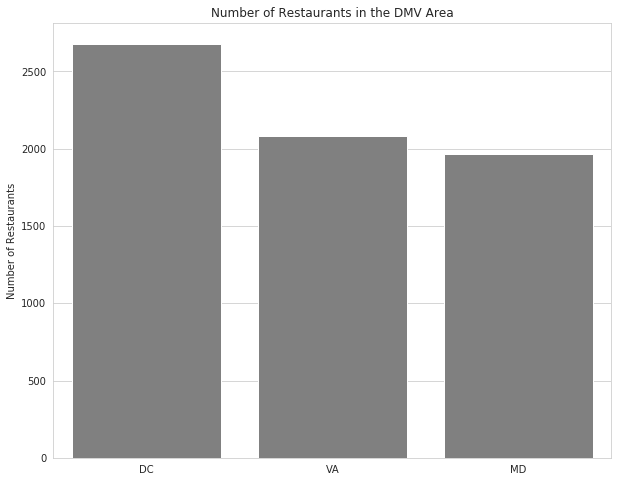

In [16]:
state_count = df.state.value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(state_count.index, state_count.values, color="grey")
plt.title("Number of Restaurants in the DMV Area")
plt.ylabel("Number of Restaurants")
plt.show()

Nice! Enough data for each group.

Get rid of location column:

In [17]:
df.drop(columns=["location"], inplace=True, axis=1)

In [18]:
df.head()

,categories,hours,id,name,price,rating,review_count,special_hours,state
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,$$,3.5,372,NaN,MD
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,VA
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,IHOP,$$,2.5,125,NaN,MD
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",NaN,-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,$,4.0,13,NaN,MD
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,$,4.5,2,NaN,VA


### Cuisines

Study each area's most popular cuisines:

In [19]:
df["cuisines"] = df.categories.apply(lambda x: "|".join([i["title"] for i in x]))

Get rid of categories column:

In [20]:
df.drop(columns=["categories"], inplace=True, axis=1)

In [21]:
df.head()

,hours,id,name,price,rating,review_count,special_hours,state,cuisines
0,"[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,$$,3.5,372,NaN,MD,Salad|Seafood|American (Traditional)
1,"[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,VA,Pizza|American (New)|Salad
2,"[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,IHOP,$$,2.5,125,NaN,MD,Breakfast & Brunch|American (Traditional)|Burgers
3,NaN,-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,$,4.0,13,NaN,MD,Seafood
4,"[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,$,4.5,2,NaN,VA,Donuts|Coffee & Tea|Breakfast & Brunch


Helper function to split cuisines:

In [22]:
def split_rows(df, col1, col2, sep):
    '''
    input: 
    df: dataframe to use
    col1 and col2 (use col2 to split)
    return:
    a df table with col1 as common col and col2 split into multiple rows
    '''
    series = [pd.Series(row[col1], row[col2].split(sep))
              for _, row in df.iterrows()]
    table = pd.concat(series).reset_index()
    table.rename(columns={"index": "cuisine", 0: "id"}, inplace=True)
    return table

Use helper function on cuisines:

In [23]:
df_add = split_rows(df, "id", "cuisines", "|")
df_add.head()

,cuisine,id
0,Salad,--saaXOpXBfC6-pvmTP5mw
1,Seafood,--saaXOpXBfC6-pvmTP5mw
2,American (Traditional),--saaXOpXBfC6-pvmTP5mw
3,Pizza,-0EptA8Ci4gad0arJph4VQ
4,American (New),-0EptA8Ci4gad0arJph4VQ


In [24]:
df.head()

,hours,id,name,price,rating,review_count,special_hours,state,cuisines
0,"[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,$$,3.5,372,NaN,MD,Salad|Seafood|American (Traditional)
1,"[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,VA,Pizza|American (New)|Salad
2,"[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,IHOP,$$,2.5,125,NaN,MD,Breakfast & Brunch|American (Traditional)|Burgers
3,NaN,-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,$,4.0,13,NaN,MD,Seafood
4,"[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,$,4.5,2,NaN,VA,Donuts|Coffee & Tea|Breakfast & Brunch


Join with original df:

In [25]:
df = df.merge(df_add, on="id", how="inner")

In [26]:
df.drop("cuisines", inplace=True, axis=1)

In [27]:
df.head(10)

,hours,id,name,price,rating,review_count,special_hours,state,cuisine
0,"[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,$$,3.5,372,NaN,MD,Salad
1,"[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,$$,3.5,372,NaN,MD,Seafood
2,"[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,$$,3.5,372,NaN,MD,American (Traditional)
3,"[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,VA,Pizza
4,"[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,VA,American (New)
5,"[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,$$,3.5,192,NaN,VA,Salad
6,"[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,IHOP,$$,2.5,125,NaN,MD,Breakfast & Brunch
7,"[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,IHOP,$$,2.5,125,NaN,MD,American (Traditional)
8,"[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,IHOP,$$,2.5,125,NaN,MD,Burgers
9,NaN,-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,$,4.0,13,NaN,MD,Seafood


In [28]:
len(df)

13946

Split data, state wise:

In [29]:
dc = df[df.state == "DC"]
dc.shape

(5594, 9)

In [30]:
va = df[df.state == "VA"]
va.shape

(4382, 9)

In [31]:
md = df[df.state == "MD"]
md.shape

(3970, 9)

**DC**

Total number of restaurants for each cuisine:

In [32]:
dc_count_by_cuisine = dc.groupby("cuisine")["review_count"].count()

In [33]:
dc_count_by_cuisine.sort_values(ascending=False).head()

cuisine
Sandwiches                403
Breakfast & Brunch        259
American (New)            249
American (Traditional)    241
Fast Food                 238
Name: review_count, dtype: int64

We want cuisines that have at least 20 restaurants:

In [34]:
dc_cuisines = dc_count_by_cuisine[dc_count_by_cuisine >= 20].index

In [35]:
print(len(dc_cuisines))
dc_cuisines

60


Index(['American (New)', 'American (Traditional)', 'Asian Fusion', 'Bakeries',
       'Barbeque', 'Bars', 'Beer Bar', 'Breakfast & Brunch', 'Burgers',
       'Cafes', 'Caribbean', 'Chicken Shop', 'Chicken Wings', 'Chinese',
       'Cocktail Bars', 'Coffee & Tea', 'Delis', 'Desserts', 'Diners',
       'Ethiopian', 'Fast Food', 'Food Stands', 'Food Trucks', 'French',
       'Gluten-Free', 'Greek', 'Halal', 'Indian', 'Italian', 'Japanese',
       'Juice Bars & Smoothies', 'Korean', 'Latin American', 'Lounges',
       'Mediterranean', 'Mexican', 'Middle Eastern', 'Pizza', 'Pubs', 'Ramen',
       'Salad', 'Salvadoran', 'Sandwiches', 'Seafood', 'Soul Food', 'Soup',
       'Southern', 'Spanish', 'Sports Bars', 'Steakhouses', 'Sushi Bars',
       'Tacos', 'Tapas/Small Plates', 'Tex-Mex', 'Thai', 'Vegan', 'Vegetarian',
       'Venues & Event Spaces', 'Vietnamese', 'Wine Bars'],
      dtype='object', name='cuisine')

Update dc df:

In [36]:
dc_new = dc[dc.cuisine.isin(dc_cuisines)]
dc_new.reset_index(inplace=True, drop=True)

In [37]:
dc_new

,hours,id,name,price,rating,review_count,special_hours,state,cuisine
0,"[{'open': [{'is_overnight': False, 'start': '1...",-3r9TfGuLzx_CRh9b8u6iA,Absolute Thai Restaurant,$$,3.5,374,NaN,DC,Thai
1,"[{'open': [{'is_overnight': False, 'start': '0...",-7AZWvUzAiAI-rnAW-WoqQ,Ricks Cafe,$$,3.5,72,NaN,DC,Caribbean
2,"[{'open': [{'is_overnight': False, 'start': '1...",-8KtYXAQNOh1339Z7gl4WQ,Chopt Creative Salad Co.,$,3.0,50,NaN,DC,Salad
3,"[{'open': [{'is_overnight': False, 'start': '1...",-8KtYXAQNOh1339Z7gl4WQ,Chopt Creative Salad Co.,$,3.0,50,NaN,DC,Vegetarian
4,"[{'open': [{'is_overnight': True, 'start': '11...",-8cgezcs-xEpJ_K4O8LxVA,Harry's Restaurant,$$,3.0,449,NaN,DC,American (Traditional)
5,"[{'open': [{'is_overnight': False, 'start': '1...",-9X0Ukem1bpQP0wEW7RRSg,KT Pizza,$$,4.0,34,NaN,DC,Food Trucks
6,"[{'open': [{'is_overnight': False, 'start': '1...",-9X0Ukem1bpQP0wEW7RRSg,KT Pizza,$$,4.0,34,NaN,DC,Pizza
7,"[{'open': [{'is_overnight': False, 'start': '1...",-9sZ7KDcpFEY1hLKMI33Vw,Mario's House Pizza,$,4.5,18,NaN,DC,Pizza
8,"[{'open': [{'is_overnight': False, 'start': '1...",-AKrF7NTbrIb7FWxzCYvfA,Borinquen Lunch Box,$,4.0,80,NaN,DC,Food Trucks
9,"[{'open': [{'is_overnight': False, 'start': '1...",-DO9zy9e9B4bx_g83F0kkw,Pho Junkies,$$,4.5,163,NaN,DC,Vietnamese


Total number of reviews for each cuisine:

In [38]:
dc_sum_review_by_cuisine = dc_new.groupby("cuisine")["review_count"].sum()

In [39]:
dc_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisine
Breakfast & Brunch        100676
American (New)             90115
American (Traditional)     86643
Bars                       77285
Pizza                      40717
Name: review_count, dtype: int64

Total number of restaurants for each cuisine:

In [40]:
dc_count_by_cuisine = dc_new.groupby("cuisine")["review_count"].count()

In [41]:
dc_count_by_cuisine.sort_values(ascending=False).head()

cuisine
Sandwiches                403
Breakfast & Brunch        259
American (New)            249
American (Traditional)    241
Fast Food                 238
Name: review_count, dtype: int64

In [42]:
# dc_new.groupby("cuisines")["review_count"].sum().head(10)

In [43]:
# dc_new.groupby("cuisines")["review_count"].count().head(10)

"Standardized" number of reviews for each cuisine:

In [44]:
dc_std_sum_review_by_cuisine = dc_sum_review_by_cuisine / dc_count_by_cuisine

In [45]:
dc_std_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisine
Ramen          625.095238
Spanish        564.800000
Beer Bar       467.450000
Greek          455.259259
Steakhouses    436.500000
Name: review_count, dtype: float64

Check:

In [46]:
dc_count_by_cuisine["Ramen"]

21

In [47]:
dc_count_by_cuisine["Spanish"]

20

Welch’s t-test -> Ramen and Spanish

**VA**

Total number of restaurants for each cuisine:

In [48]:
va_count_by_cuisine = va.groupby("cuisine")["review_count"].count()

In [49]:
va_count_by_cuisine.sort_values(ascending=False).head()

cuisine
Sandwiches                288
Fast Food                 237
Pizza                     216
American (Traditional)    191
Breakfast & Brunch        153
Name: review_count, dtype: int64

We want cuisines that have at least 20 restaurants:

In [50]:
va_cuisines = va_count_by_cuisine[va_count_by_cuisine >= 20].index

In [51]:
print(len(va_cuisines))
va_cuisines

46


Index(['American (New)', 'American (Traditional)', 'Asian Fusion', 'Bakeries',
       'Barbeque', 'Bars', 'Breakfast & Brunch', 'Buffets', 'Burgers', 'Cafes',
       'Chicken Shop', 'Chicken Wings', 'Chinese', 'Cocktail Bars',
       'Coffee & Tea', 'Delis', 'Desserts', 'Ethiopian', 'Fast Food',
       'Food Trucks', 'Greek', 'Halal', 'Indian', 'Italian', 'Japanese',
       'Korean', 'Latin American', 'Mediterranean', 'Mexican',
       'Middle Eastern', 'Noodles', 'Peruvian', 'Pizza', 'Salad', 'Salvadoran',
       'Sandwiches', 'Seafood', 'Soup', 'Sports Bars', 'Steakhouses',
       'Sushi Bars', 'Tex-Mex', 'Thai', 'Vegetarian', 'Vietnamese',
       'Wine Bars'],
      dtype='object', name='cuisine')

Update va df:

In [52]:
va_new = va[va.cuisine.isin(va_cuisines)]
va_new.reset_index(inplace=True, drop=True)

Total number of reviews for each cuisine:

In [53]:
va_sum_review_by_cuisine = va_new.groupby("cuisine")["review_count"].sum()

In [54]:
va_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisine
American (Traditional)    45867
Bars                      41327
American (New)            39511
Breakfast & Brunch        35454
Pizza                     32849
Name: review_count, dtype: int64

Total number of restaurants for each cuisine:

In [55]:
va_count_by_cuisine = va_new.groupby("cuisine")["review_count"].count()

In [56]:
va_count_by_cuisine.sort_values(ascending=False).head()

cuisine
Sandwiches                288
Fast Food                 237
Pizza                     216
American (Traditional)    191
Breakfast & Brunch        153
Name: review_count, dtype: int64

In [57]:
# va_new.groupby("cuisines")["review_count"].sum().head(10)

In [58]:
# va_new.groupby("cuisines")["review_count"].count().head(10)

"Standardized" number of reviews for each cuisine:

In [59]:
va_std_sum_review_by_cuisine = va_sum_review_by_cuisine / va_count_by_cuisine

In [60]:
va_std_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisine
Bars              375.700000
Seafood           335.569767
Wine Bars         332.545455
Cocktail Bars     331.600000
American (New)    321.227642
Name: review_count, dtype: float64

Check:

In [61]:
va_count_by_cuisine["Bars"]

110

In [62]:
va_count_by_cuisine["Seafood"]

86

Welch’s t-test -> Bars and Seafood

**MD**

Total number of restaurants for each cuisine:

In [63]:
md_count_by_cuisine = md.groupby("cuisine")["review_count"].count()

In [64]:
md_count_by_cuisine.sort_values(ascending=False).head()

cuisine
Fast Food     331
Sandwiches    249
Pizza         214
Chinese       172
Mexican       162
Name: review_count, dtype: int64

We want cuisines that have at least 20 restaurants:

In [65]:
md_cuisines = md_count_by_cuisine[md_count_by_cuisine >= 20].index

In [66]:
print(len(md_cuisines))
md_cuisines

42


Index(['African', 'American (New)', 'American (Traditional)', 'Asian Fusion',
       'Bakeries', 'Barbeque', 'Bars', 'Breakfast & Brunch', 'Burgers',
       'Cafes', 'Caribbean', 'Chicken Shop', 'Chicken Wings', 'Chinese',
       'Coffee & Tea', 'Delis', 'Ethiopian', 'Fast Food', 'Food Trucks',
       'Indian', 'Italian', 'Japanese', 'Korean', 'Latin American',
       'Mediterranean', 'Mexican', 'Noodles', 'Peruvian', 'Pizza', 'Salad',
       'Salvadoran', 'Sandwiches', 'Seafood', 'Soul Food', 'Soup',
       'Sports Bars', 'Steakhouses', 'Sushi Bars', 'Tex-Mex', 'Thai',
       'Vegetarian', 'Vietnamese'],
      dtype='object', name='cuisine')

Update md df:

In [67]:
md_new = md[md.cuisine.isin(md_cuisines)]

In [68]:
md_new.reset_index(inplace=True, drop=True)

Total number of reviews for each cuisine:

In [69]:
md_sum_review_by_cuisine = md_new.groupby("cuisine")["review_count"].sum()

In [70]:
md_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisine
American (Traditional)    22779
Breakfast & Brunch        20982
American (New)            19855
Seafood                   18528
Pizza                     15752
Name: review_count, dtype: int64

Total number of restaurants for each cuisine:

In [71]:
md_count_by_cuisine = md_new.groupby("cuisine")["review_count"].count()

In [72]:
md_count_by_cuisine.sort_values(ascending=False).head()

cuisine
Fast Food     331
Sandwiches    249
Pizza         214
Chinese       172
Mexican       162
Name: review_count, dtype: int64

In [73]:
# md_new.groupby("cuisines")["review_count"].sum().head(10)

In [74]:
# md_new.groupby("cuisines")["review_count"].count().head(10)

"Standardized" number of reviews for each cuisine:

In [75]:
md_std_sum_review_by_cuisine = md_sum_review_by_cuisine / md_count_by_cuisine

In [76]:
md_std_sum_review_by_cuisine.sort_values(ascending=False).head()

cuisine
Bars                  260.678571
American (New)        215.815217
Steakhouses           196.500000
Breakfast & Brunch    194.277778
Thai                  181.628571
Name: review_count, dtype: float64

Check:

In [77]:
md_count_by_cuisine["Bars"]

56

In [78]:
md_count_by_cuisine["American (New)"]

92

Welch’s t-test -> Bars and American (New)

**Save data for Inferential Statistics:**

In [79]:
dc_new.to_csv("data/dc_restaurants.csv", index=False)
va_new.to_csv("data/va_restaurants.csv", index=False)
md_new.to_csv("data/md_restaurants.csv", index=False)